In [43]:
import numpy as np
from scipy.stats import bernoulli, norm, poisson
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pgmpy.factors.discrete import DiscreteFactor

### Numpy

In [112]:
# Joint Distribution
jointXY = np.array([[0.25, 0.20, 0.15],
                  [0.20, 0.10, 0.10]
                    ])
print(jointXY)

[[0.25 0.2  0.15]
 [0.2  0.1  0.1 ]]


In [113]:
pX = jointXY.sum(0)
pY = jointXY.sum(1)
print(f'pX: {pX}')
print(f'pY: {pY}')

pX: [0.45 0.3  0.25]
pY: [0.6 0.4]


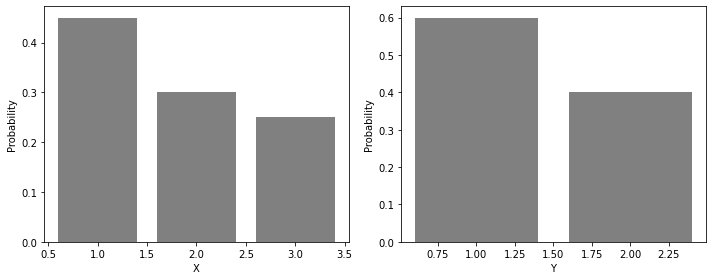

In [114]:
fig, axis = plt.subplots(1,2, figsize=(10,4))

X = np.arange(len(pX))+1
Y = np.arange(len(pY))+1

axis[0].bar(X, pX, color='gray')
axis[0].set_xlabel('X')
axis[0].set_ylabel('Probability')

axis[1].bar(Y, pY, color='gray')
axis[1].set_xlabel('Y')
axis[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()

In [116]:
# P(Y|X) Conditional Probability
jointXY / pX

array([[0.55555556, 0.66666667, 0.6       ],
       [0.44444444, 0.33333333, 0.4       ]])

### Sampling from Distributions

In [117]:
m = 0
s = 1
Z1 = norm(m,s)

m = 5
s = 1.5
Z2 = norm(m,s)

In [118]:
rvX = Z1.rvs(100)
rvY = Z2.rvs(100)
rvX.shape

(100,)

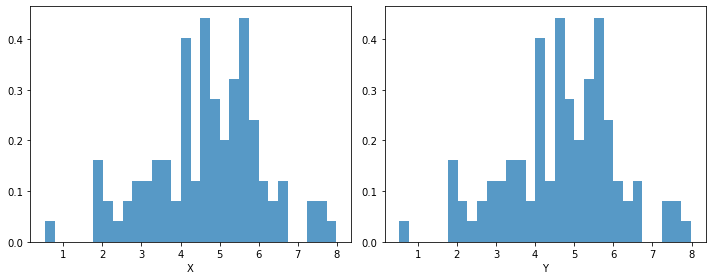

In [136]:
fig, axis = plt.subplots(1,2, figsize=(10,4))

axis[0].hist(rvY, 30, density=True, alpha=0.75)
axis[0].set_xlabel('X')
#axis[0].set_ylabel('Probability')

axis[1].hist(rvY, 30, density=True, alpha=0.75)
axis[1].set_xlabel('Y')
#axis[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()

<Figure size 288x288 with 0 Axes>

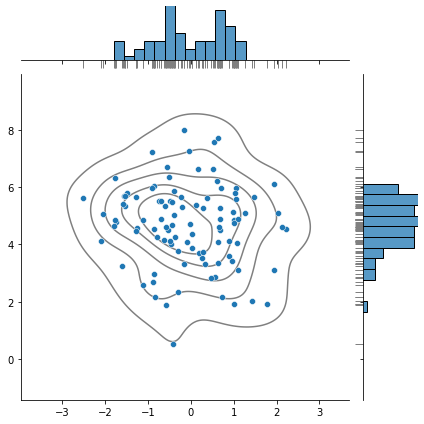

In [176]:
# Joint Plot
plt.figure(figsize=(4,4))
g = sns.jointplot(x=rvX, y=rvY, marginal_kws=dict(bins=20))
g.plot_joint(sns.kdeplot, color="gray", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="gray", height=-.15, clip_on=False)
#sns.jointplot(x=rvX, y=rvY, kind='scatter', ax=axis[2])
plt.tight_layout()
plt.show()

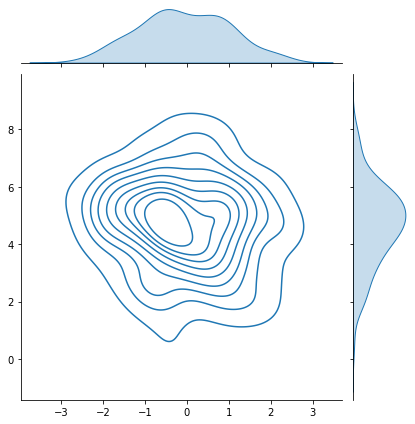

In [180]:
sns.jointplot(x=rvX, y=rvY, kind='kde', marginal_kws=dict(fill=True))